# Lab Exercise 2 Summer 2023 ITCS 3162
## Your Name: john byiringiro


### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis, data wrangline and document what you learn. Execute the code sequentially starting with library imports and continue wherever code is already entered. Follow instructions and add code or text where indicated (Question 1, Question 2, etc.). Feel free to add other code. Turn in your notebook "printed" as a PDF but be sure to Download the .ipynb version as well for continuing work or for saving when complete.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>


In [1]:
# import statements
import pandas as pd
import seaborn as sns

In [2]:
# create a variable to store the url for the data ingest
urltodata = "https://data.boston.gov/dataset/705244a6-70a6-4ff8-ab8e-56441aff18e7/resource/800a2663-1d6a-46e7-9356-bedb70f5332c/download/tmpfbdp9ex7.csv"

In [3]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [4]:
# examine the first few rows of data
bostondata.head()

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V687305,2023-07-25 09:44:24,Open,116,NaN,Unsafe Structures,50,150,Causeway,ST,...,3,100 LEGENDS WAY,C/O BOSTON GARDEN FINANCE DEPT,BOSTON,MA,02114,340676,42.365645,-71.061655,"(42.365645195318876, -71.06165549043968)"
1,V687293,2023-07-25 08:58:25,Open,116,NaN,Unsafe Structures,460,468,Blue Hill,AV,...,14,136 BROOKLINE AVE,NaN,BOSTON,MA,02115,352061,42.308787,-71.081838,"(42.30878660285126, -71.08183754888226)"
2,V687288,2023-07-25 08:44:15,Open,105.1,NaN,Failure to Obtain Permit,148,NaN,Fairmount,ST,...,17,148 FAIRMOUNT STREET,NaN,DORCHESTER,MA,02124,55782,42.279610,-71.077591,"(42.27960955308069, -71.07759066625086)"
3,V687262,2023-07-25 08:07:09,Open,105.1,NaN,Failure to Obtain Permit,173,NaN,Cambridge,ST,...,22,173 CAMBRIDGE STREET,NaN,ALLSTON,MA,02134,25083,42.358860,-71.124501,"(42.35885960595487, -71.12450059398215)"
4,V687168,2023-07-24 11:54:05,Open,102.8,NaN,Maintenance,803,NaN,Centre,ST,...,19,803 CENTRE STREET,NaN,JAMAICA PLAIN,MA,02130,28222,42.309280,-71.116871,"(42.30927960346573, -71.11687068790188)"


## Question 1 Part A: using code, document the nulls in the dataset.

In [5]:
#Question 1 Part A using code, show the nulls in the
null_counts = bostondata.isnull().sum()

# Print the result
print(null_counts)

case_no                 0
status_dttm             0
status                  0
code                    0
value               14414
description           225
violation_stno          0
violation_sthigh    10419
violation_street        0
violation_suffix      105
violation_city          1
violation_state         0
violation_zip           3
ward                    0
contact_addr1           4
contact_addr2       11803
contact_city            1
contact_state           2
contact_zip             5
sam_id                  0
latitude                0
longitude               0
location                0
dtype: int64


## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

## Question 1 Part B Answer:
I would use the following method: Remove Rows containing Nulls: If the dataset is big and the number of rows with null values is modest, it may be fair to simply eliminate such rows. This strategy, however, is not suggested if the missing data is significant or if it is not absent at random, since it may result in bias.

Mean/Median/Mode Imputation: Numerical values can be substituted with the mean or median of the remaining data in that column. The mode (most frequent value) is commonly used for categorical data. This approach is quick and simple, but it presupposes that the missingness is fully random, which is not always the case.


In [6]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14414 entries, 0 to 14413
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           14414 non-null  object 
 1   status_dttm       14414 non-null  object 
 2   status            14414 non-null  object 
 3   code              14414 non-null  object 
 4   value             0 non-null      float64
 5   description       14189 non-null  object 
 6   violation_stno    14414 non-null  object 
 7   violation_sthigh  3995 non-null   object 
 8   violation_street  14414 non-null  object 
 9   violation_suffix  14309 non-null  object 
 10  violation_city    14413 non-null  object 
 11  violation_state   14414 non-null  object 
 12  violation_zip     14411 non-null  float64
 13  ward              14414 non-null  int64  
 14  contact_addr1     14410 non-null  object 
 15  contact_addr2     2611 non-null   object 
 16  contact_city      14413 non-null  object

## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

In [7]:
# Question 2 code: lets get the value counts for our new column
month_counts = bostondata['month'].value_counts()

# Print the result
print(month_counts)

3     1471
9     1426
5     1336
6     1331
4     1273
7     1260
2     1195
10    1153
8     1084
1     1003
12     955
11     927
Name: month, dtype: int64


## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [8]:
#Question 3 code: statistical information
numerical_stats = bostondata.describe()

# Print the result
print(numerical_stats)

       value  violation_zip          ward         sam_id      latitude  \
count    0.0   14411.000000  14414.000000   14414.000000  14414.000000   
mean     NaN    2125.355909     11.087623   97930.196337     42.325023   
std      NaN      12.306742      6.777287   72333.616981      0.035509   
min      NaN    2108.000000      1.000000      22.000000     42.232100   
25%      NaN    2120.000000      5.000000   48483.000000     42.296652   
50%      NaN    2125.000000     12.000000   92749.000000     42.325609   
75%      NaN    2128.000000     17.000000  131909.000000     42.354219   
max      NaN    2467.000000     22.000000  454226.000000     42.392560   

          longitude         month  
count  14414.000000  14414.000000  
mean     -71.080301      6.318649  
std        0.034662      3.298674  
min      -71.181831      1.000000  
25%      -71.098043      3.000000  
50%      -71.074116      6.000000  
75%      -71.057943      9.000000  
max      -70.995970     12.000000  


## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

In [9]:
#Question 4 Part A Code: Value Counts

description_counts = bostondata['description'].value_counts(normalize=True)

# Print the result
print(description_counts)

Failure to Obtain Permit       0.246388
Unsafe and Dangerous           0.238354
Maintenance                    0.081824
Testing & Certification        0.050744
Right of Entry                 0.044753
                                 ...   
Clothes Dryer Exhaust          0.000070
Maintenance Access Features    0.000070
Circuit Impedance              0.000070
Operational Constraints        0.000070
Fences                         0.000070
Name: description, Length: 392, dtype: float64


## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:
Failure to Obtain Permit: This is the most prevalent issue, accounting for around 24.64% of all descriptions.

Unsafe and Dangerous: This is the second most prevalent concern, accounting for around 23.84% of all descriptions.

Maintenance is the third most prevalent difficulty, accounting for around 8.18% of all descriptions.
The most prevalent concern, "Failure to Obtain Permit," shows that many breaches are due to executing work without the proper approvals. The other typical difficulties are related to safety and maintenance.



#

## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.

In [10]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [11]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 4 to 14413
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           4543 non-null   object 
 1   status_dttm       4543 non-null   object 
 2   status            4543 non-null   object 
 3   code              4543 non-null   object 
 4   value             0 non-null      float64
 5   description       4543 non-null   object 
 6   violation_stno    4543 non-null   object 
 7   violation_sthigh  1237 non-null   object 
 8   violation_street  4543 non-null   object 
 9   violation_suffix  4521 non-null   object 
 10  violation_city    4543 non-null   object 
 11  violation_state   4543 non-null   object 
 12  violation_zip     4543 non-null   float64
 13  ward              4543 non-null   int64  
 14  contact_addr1     4542 non-null   object 
 15  contact_addr2     880 non-null    object 
 16  contact_city      4543 non-null   object 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data.

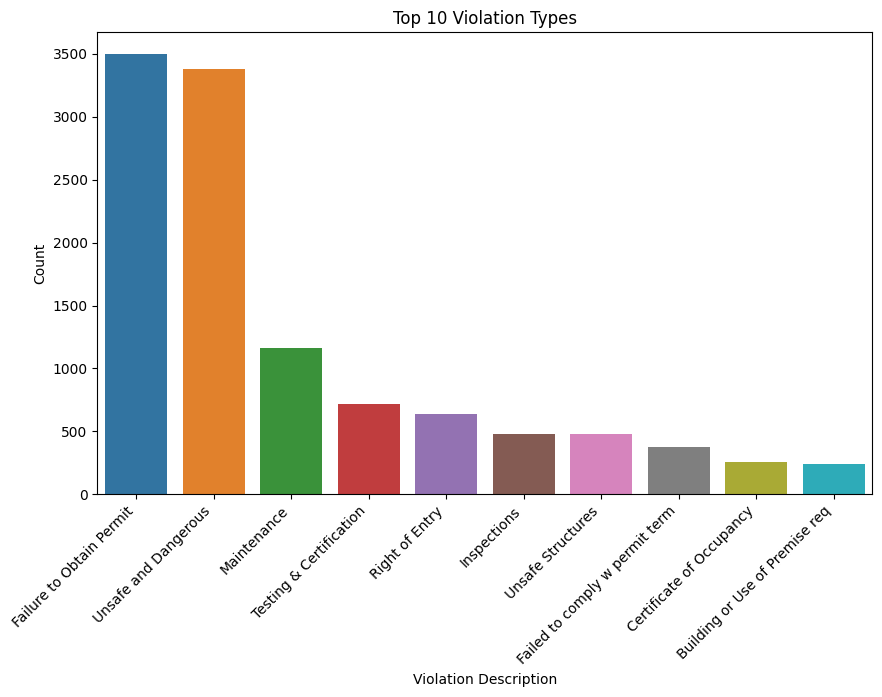

In [13]:
# Question 5 Visualization
import matplotlib.pyplot as plt

# Get the value counts for the 'description' column
description_counts = bostondata['description'].value_counts()

# Create a bar plot for the top 10 violation types
plt.figure(figsize=(10, 6))
sns.barplot(x=description_counts[:10].index, y=description_counts[:10].values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Violation Description')
plt.ylabel('Count')
plt.title('Top 10 Violation Types')
plt.show()

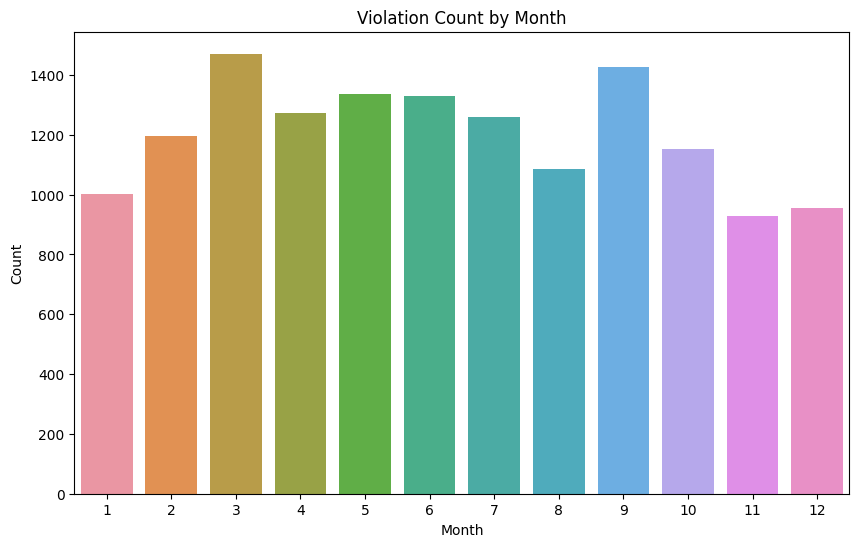

In [15]:
# Question 6 Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=bostondata)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Violation Count by Month')
plt.show()

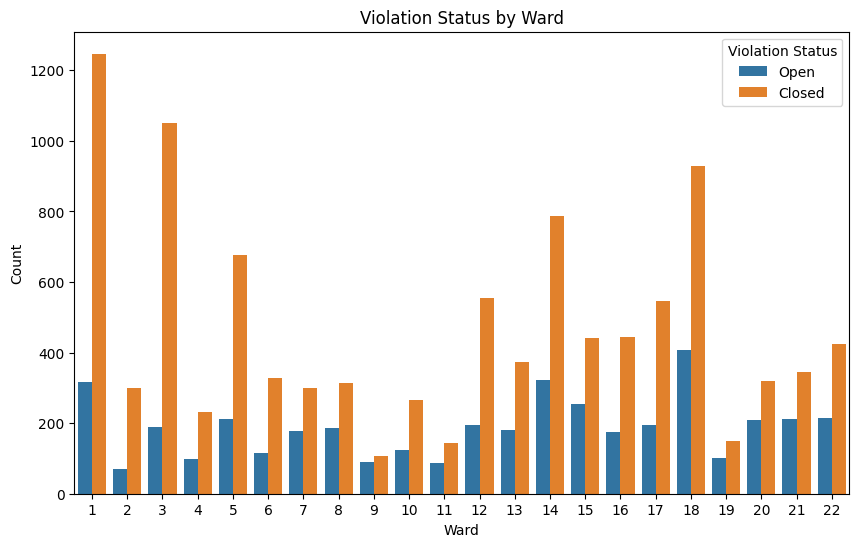

In [16]:
# Question 7 Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='ward', hue='status', data=bostondata)
plt.xlabel('Ward')
plt.ylabel('Count')
plt.title('Violation Status by Ward')
plt.legend(title='Violation Status', loc='upper right')
plt.show()

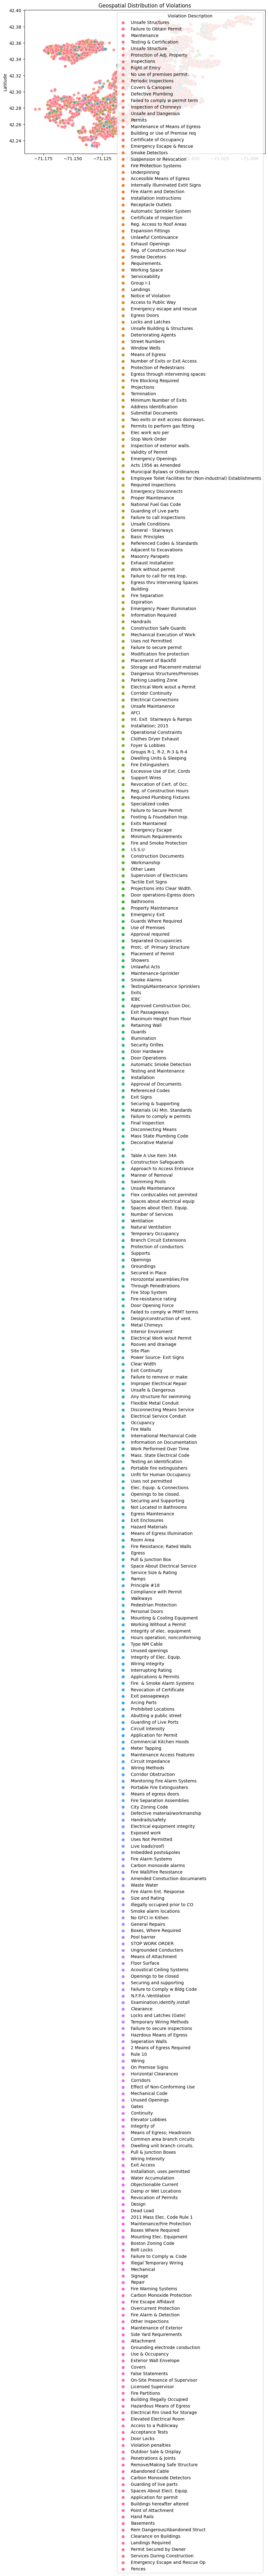

In [17]:
# Question 8 Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=bostondata, hue='description', alpha=0.7, s=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Violations')
plt.legend(title='Violation Description', loc='upper right')
plt.show()

## Question 9:  What have you learned from Exploratory Data Analysis?


## Question 9 Answer:
I learned a lot about the type of infractions and their patterns over time and across locations by conducting exploratory data analysis (EDA) on the Boston Data.

The 'description' column analysis first highlighted the most prevalent issues. The most common offense was a "Failure to Obtain Permit," emphasizing the importance of enhanced permit awareness and enforcement. The second and third most prevalent difficulties were "Unsafe and Dangerous" scenarios and "Maintenance" issues, emphasizing the significance of regular safety inspections and maintenance.

